# ASSIGNMENT 2 

In this exercise we will see if we can predict a loan default from a bank for 30,000 customers using kNN and a neural network. We'll also segment the customers to see if default rates differ by age segment.

In [ ]:
# Libraries to import 

import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt  ## Data Visualization 
import seaborn as sns # Statistical Data Visualization based graphs
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [38]:
#import data
bank = pd.read_csv("C:/Users/Parag Garg/OneDrive - Southern Methodist University/Desktop/Data Mining/Assignment 2/default_of_credit_card_clients.csv", header = 1)

#preview data
bank.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# DATA SCRUBBING PART 

In [39]:
## ID and Sequence number is both same in nature. So we are going to omit the ID from the bank dataset 

bank= bank.drop(['ID'],axis=1)

In [40]:
bank.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Rest all the fields are important to perform our prediction. 

In [41]:
# Check the data type 

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [42]:
#create a table for numeric values
numeric = bank.select_dtypes(include = ['int64'])
numeric.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [43]:
#count the unique values for each numeric variable
stuff = numeric.agg(['nunique'])
stuff.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
nunique,81,2,7,4,56,11,11,11,11,10,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2


In [44]:
# Now check what are the numeric variables having more than 10 distinct value 

continuous = []
for a in stuff :
    if stuff [a][0] > 10:
        continuous.append(a)
        print(a, stuff[a][0])

LIMIT_BAL 81
AGE 56
PAY_0 11
PAY_2 11
PAY_3 11
PAY_4 11
BILL_AMT1 22723
BILL_AMT2 22346
BILL_AMT3 22026
BILL_AMT4 21548
BILL_AMT5 21010
BILL_AMT6 20604
PAY_AMT1 7943
PAY_AMT2 7899
PAY_AMT3 7518
PAY_AMT4 6937
PAY_AMT5 6897
PAY_AMT6 6939


In [45]:
## Next Parameter in data scrubbing to check do we have any missing value in numeric variable or not along with all mathematic equations

def missing (m) :
    return m.isna().sum()

bank[continuous].agg([missing, 'min', 'max','median','mean', 'std','skew','kurt'])

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
missing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000
median,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.681500,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.961470,15666.159744,15278.305679,17777.465775
skew,0.992867,0.732246,0.731975,0.790565,0.840682,0.999629,2.663861,2.705221,3.087830e+00,2.821965,2.876380,2.846645,14.668364,3.045382e+01,17.216635,12.904985,11.127417,10.640727
kurt,0.536263,0.044303,2.720715,1.570418,2.084436,3.496983,9.806289,10.302946,1.978326e+01,11.309325,12.305881,12.270705,415.254743,1.641632e+03,564.311229,277.333768,180.063940,167.161430


In [46]:
# Missing Value in dataset
bank.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

##### We conclude that there is no missing value in dataset.

### Q1: Slice and Dice

#### Q1.1 How many customers are in the sample? 

In [47]:
bank.shape 

(30000, 24)

###### There are 30,000 customers in the sample.

#### Q1.2 What is the most common sex in the sample?

In [48]:
bank["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

So we conclude that Male = 11888 and Female = 18112 

In [49]:
male = 11888
female = 18112
common_sex = female - male 
Total_sex = female + male
print (common_sex)

6224


#### The most common sex in this sample is females as there are 6,224 more females versus males.

In [50]:
percentage_male = round((male/Total_sex)*100)
percentage_female = round((female/Total_sex)*100)
print("Percentage of Male " , percentage_male,"%")
print("Percentage of Female " , percentage_female,"%")

Percentage of Male  40 %
Percentage of Female  60 %


#### Sample is 60 % female and 40 % male.

#### Q1.3 Which sex has the most defaults?

In [51]:
bank_male = bank[bank["SEX"] == 1]
bank_female = bank[bank["SEX"] == 2]

In [52]:
#male count - 0 = No Default and 1 = Default 
bank_male["default payment next month"].value_counts()

0    9015
1    2873
Name: default payment next month, dtype: int64

In [53]:
male_default = 2873
male_no_default = 9015 
Total = male_default + male_no_default
Percentage_default = (male_default/Total)*100
print("From a percentage prospective, male default rate :",Percentage_default,"%" )

From a percentage prospective, male default rate : 24.16722745625841 %


In [54]:
#Female count - 0 = No Default and 1 = Default
bank_female["default payment next month"].value_counts()

0    14349
1     3763
Name: default payment next month, dtype: int64

In [55]:
female_default = 3763
female_no_default = 14349
total = female_default + female_no_default
Percentage_default_female = (female_default/total)*100
print("From a percentage prospective, female default rate :",Percentage_default_female,"%" )

From a percentage prospective, female default rate : 20.776280918727917 %


##### From a percentage perspective, males have a higher rate of defaults (24.17%) compared to females (20.78%)

### Q1.4 How many distinct values does marriage take on?

In [56]:
bank["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

##### There are 4 Distinct Value for Marriage 

## Q2: Histograms and Boxplots

#### Use boxplots or histograms to answer the following:

  Q2.1 How is BILL_AMT1 distributed by sex?

In [57]:
print(bank_male)

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
4          50000    1          2         1   57     -1      0     -1      0   
5          50000    1          1         2   37      0      0      0      0   
6         500000    1          1         2   29      0      0      0      0   
9          20000    1          3         2   35     -2     -2     -2     -2   
13         70000    1          2         2   30      1      2      2      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [58]:
print(bank_female)

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
7         100000    2          2         2   23      0     -1     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29180     140000    2          2         1   60      2      2      0      0   
29181     170000    2          3         1   57      0      0      0      0   
29182     280000    2          1         1   56     -2     -2     -2     -2   
29185      50000    2          3         2   55      2      0      0      0   
29282      80000    2          1         3   25      0     -1     -1     -1   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [59]:
# BILL_AMT1= amount of bill statement in September, 2005

BILL_AMT1_male = bank_male['BILL_AMT1']
BILL_AMT1_female = bank_female['BILL_AMT1']
print("Male Bill Statement in Sept 2005 \n", BILL_AMT1_male)
print("\nFemale Bill Statement in Sept 2005 \n", BILL_AMT1_female)

Male Bill Statement in Sept 2005 
 4          8617
5         64400
6        367965
9             0
13        65802
          ...  
29995    188948
29996      1683
29997      3565
29998     -1645
29999     47929
Name: BILL_AMT1, Length: 11888, dtype: int64

Female Bill Statement in Sept 2005 
 0          3913
1          2682
2         29239
3         46990
7         11876
          ...  
29180    113079
29181    163452
29182      4320
29185     13741
29282      8900
Name: BILL_AMT1, Length: 18112, dtype: int64


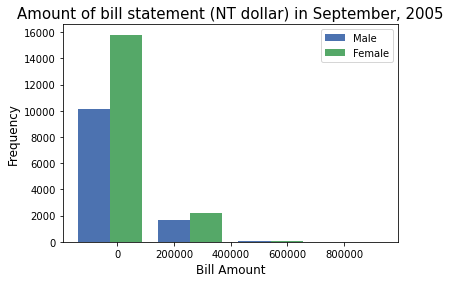

In [60]:
plt.style.use('seaborn-deep')
plt.hist([BILL_AMT1_male, BILL_AMT1_female], bins = 4, label=['Male', 'Female'])
plt.legend(loc='upper right')
plt.title('Amount of bill statement (NT dollar) in September, 2005', fontsize=15)
plt.xlabel('Bill Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

##### Ignoring the zero Bill amount, we can conclude that Both male and female distributions are approximately the same as the distribution

### Q2.2 Does there appear to be any relationship between default and AGE?

In [61]:
bank_default = bank[bank["default payment next month"] == 1]

print (bank_default)

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
13         70000    1          2         2   30      1      2      2      0   
16         20000    1          1         2   24      0      0      2      2   
21        120000    2          2         1   39     -1     -1     -1     -1   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29991     210000    1          2         1   34      3      2      2      2   
29994      80000    1          2         2   34      2      2      2      2   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

Text(0, 0.5, 'Frequency')

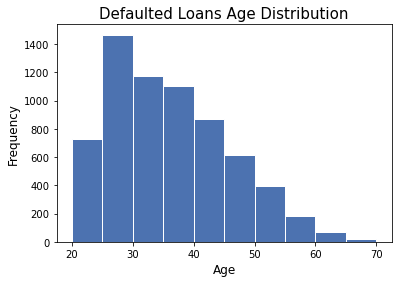

In [62]:
plt.hist(bank_default['AGE'],bins=[20,25,30,35,40,45,50,55,60,65,70], edgecolor='#ffffff')
plt.title('Defaulted Loans Age Distribution', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

##### Yes, there is a relationship between defaulted loans and age. The majority of the defaulted loans come between ages 25-45.

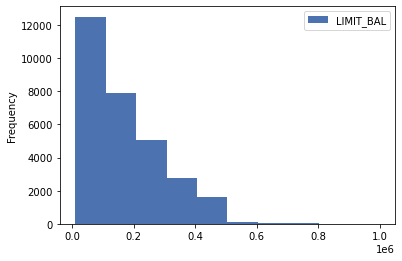

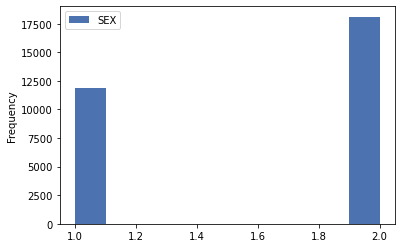

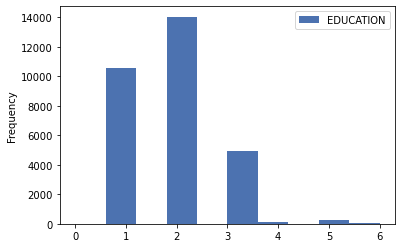

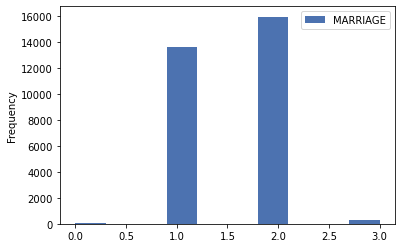

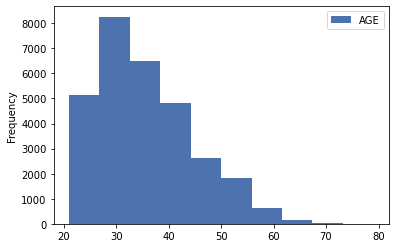

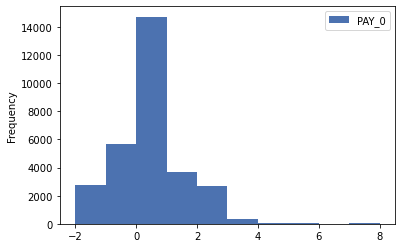

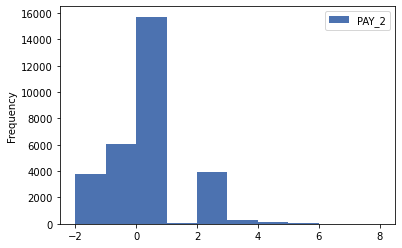

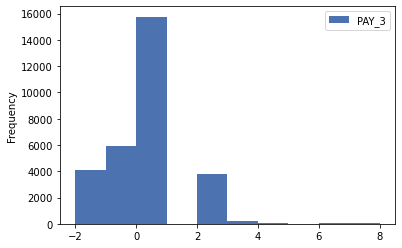

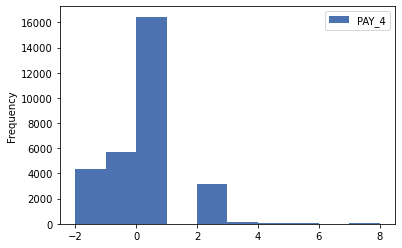

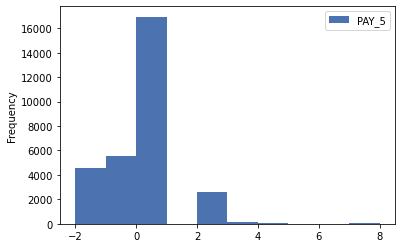

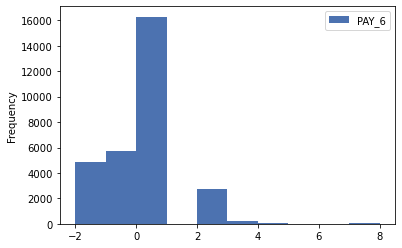

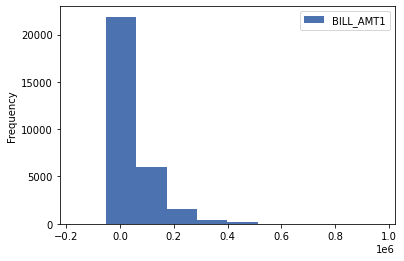

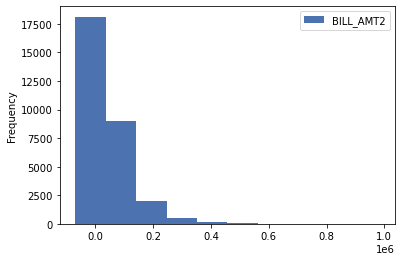

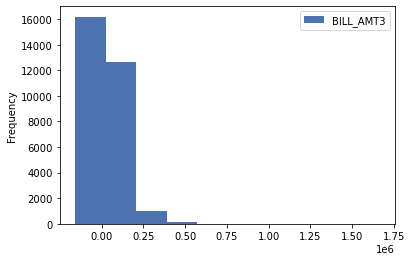

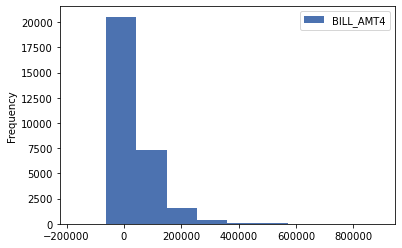

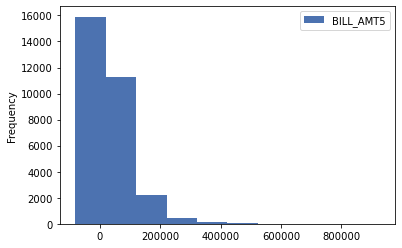

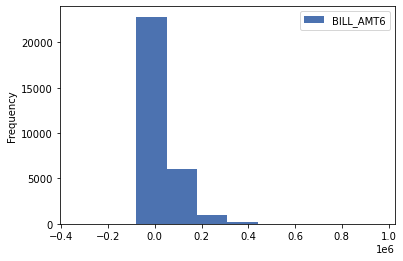

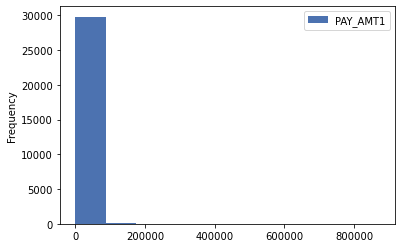

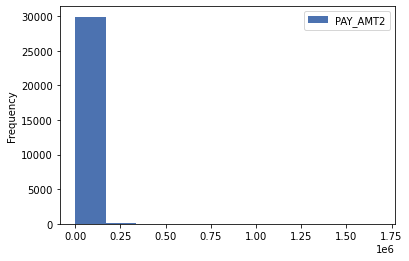

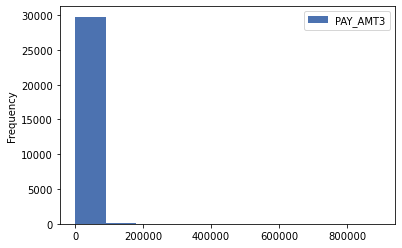

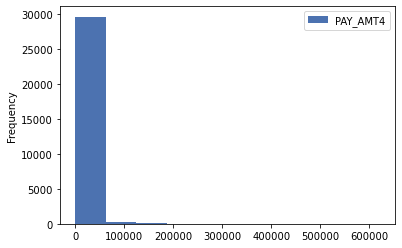

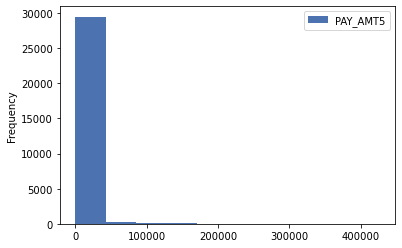

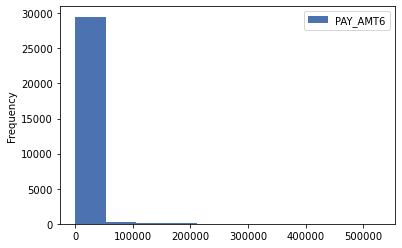

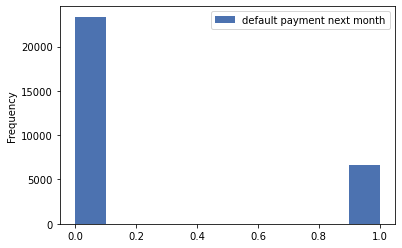

In [63]:
## All the data frames 

for col in numeric:
    pd.DataFrame(bank[col]).plot.hist()

In [64]:
# Export clean data to be used for Modeling
bank.to_csv("cleaned_default_of_credit_card_clients_data.csv", index = False)

In [65]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

from keras.models import Sequential
from keras.layers import Dense

In [66]:
#get all paramters asides from default payment next month (since we are predicting this)

features = [
    'LIMIT_BAL',
    'SEX',
    'EDUCATION',
    'MARRIAGE',
    'AGE',
    'PAY_0',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6',
    'BILL_AMT1',
    'BILL_AMT2',
    'BILL_AMT3',
    'BILL_AMT4',
    'BILL_AMT5',
    'BILL_AMT6',
    'PAY_AMT1',
    'PAY_AMT2',
    'PAY_AMT3',
    'PAY_AMT4',
    'PAY_AMT5',
    'PAY_AMT6']

x = bank[features].values

In [67]:
#scale the data

scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-1.13672015,  0.81016074,  0.18582826, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.18582826, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.45111372, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [68]:
#define y
y = bank["default payment next month"]

In [69]:
#split x and y into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21000, 23), (9000, 23), (21000,), (9000,))

#### Ques 4.1

from sklearn.neural_network import MLPClassifier

ann=MLPClassifier().fit(x_train,y_train)

predictions=ann.predict(x_test)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
con_mat = confusion_matrix(y_test, predictions)

con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]  
con_mat_norm = np.around(con_mat_norm, decimals=2)

plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_norm, annot=True, cmap='Blues')

plt.ylim(0,2)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
# plt.savefig('res11.jpg',dpi=500)
plt.show()

from sklearn.metrics import roc_auc_score, confusion_matrix, auc

y_pred_proba1 = ann.predict_proba(x_test)[:,1]

fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_proba1)

roc_auc1 = auc(fpr1,tpr1) 
plt.figure(figsize=(8,6))
plt.plot(fpr1,tpr1,'b',label= 'KNN AUC= %0.3f' % roc_auc1)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--') 
plt.axis([0,1,0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.title('ROC of KNN')
plt.show()

In [90]:
#Neural Network setup
newX = bank.drop(columns=['default payment next month'])
y = bank["default payment next month"]
x_train, x_test, y_train, y_test = train_test_split(newX, y, test_size=0.30, random_state=0)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [91]:
#Define ANN model
ANNmodel = Sequential()

ANNmodel.add(Dense(10, activation='relu', input_shape=(len(newX.columns),)))
ANNmodel.add(Dense(6, activation='relu'))
ANNmodel.add(Dense(1, activation='sigmoid'))

ANNmodel.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [92]:
#ANN Model
ANNmodel.fit(x_train, y_train, epochs=10, batch_size=1, verbose=0)

KeyboardInterrupt: 

In [ ]:
#ANN Validation
y_pred_ANN = ANNmodel.predict(x_test)[:,0]

y_pred_ANN[y_pred_ANN >= .5] = 1
y_pred_ANN[y_pred_ANN < .5] = 0

print("ANN:")
print(classification_report(y_test, y_pred_ANN))

In [ ]:
#Confusion table data for ANN
ct = confusion_matrix(y_test, y_pred_ANN)

TP = ct[0,0]
TN = ct[1,1]
FP = ct[0,1]
FN = ct[1,0]
total = TP + TN + FP + FN

print('True Positive (TP) = ', TP)
print('True Negative (TN) = ', TN)
print('False Positive (FP) = ', FP)
print('False Negative (FN) = ', FN)